# Baseline examples

Charles Le Losq

August 2016

This notebook shows examples of how to use the baseline function, and compares the outcomes of using splines over machine learning algorithms.
    
First we call the relevant libraries. Note that Scikit Learn SHOULD be installed to your system to use the machine learning algorithms...

In [24]:
using Spectra
using PyPlot

Now we import one of the Raman spectrum from the example data folder, and we plot it to have a nice look at it.

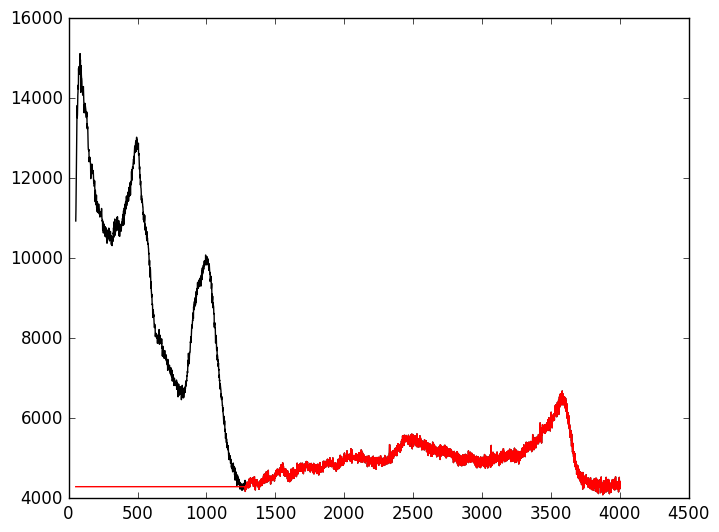

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322261e10>

In [48]:
spectra = readdlm("./data/r040.txt")
if spectra[end,1] < spectra[1,1]
    spectra = flipdim(spectra,1)
end

x = spectra[:,1]
y = spectra[:,2]

roi = [0. 200.; 750. 810.; 1260. 2000;2500 3100; 3750 4000]
x, y_long,ese_long = tlcorrection(spectra,23.0,532.0);

y_poly, bas_poly = baseline(x,y_long,roi,"poly",p=1.0)

X_low_lf = x[y .==minimum(y[1100.<x.<1400])]
Y_low_lf = mean(y[X_low_lf-5 .< x .< X_low_lf+5])
y_calc1_part1 = y[:]
y_calc1_part1[x.<X_low_lf] = Y_low_lf

figure()
plot(x,y,color="black")
plot(x,y_calc1_part1,color="red")

# Subtracting baseline from Raman spectra after temperature and excitation line effect corrections

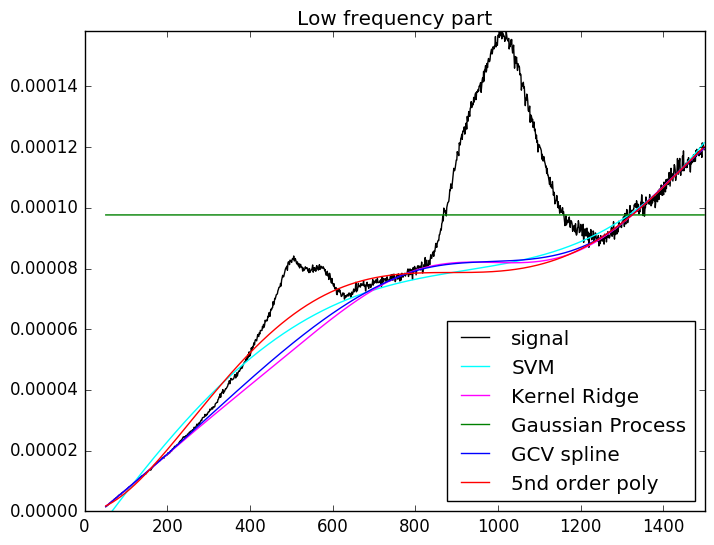

PyObject <matplotlib.legend.Legend object at 0x3276d33d0>

In [51]:
x_fit=x[x.<1500]
y_fit=y_long[x.<1500]

y_svm, bas_svm = baseline(x_fit,y_fit,roi,"SVMregression")
y_kr, bas_kr = baseline(x_fit,y_fit,roi,"KRregression")
#y_gb, bas_gb = baseline(x_fit,y_fit,roi,"GPregression")
y_gcvspline, bas_gcvspline = baseline(x_fit,y_fit,roi,"gcvspline",p=[0.5])
y_poly, bas_poly = baseline(x_fit,y_fit,roi,"poly",p=5.0)

figure()
title("Low frequency part")
plot(x_fit,y_fit,"black",label="signal")
plot(x_fit,bas_svm,"cyan",label="SVM")
plot(x_fit,bas_kr,"magenta",label="Kernel Ridge")
#plot(x_fit,bas_gb,"green",label="Gaussian Process")
plot(x_fit,bas_gcvspline,"blue",label="GCV spline")
plot(x_fit,bas_poly,"red",label="5nd order poly")
xlim(0,1500)
ylim(0,maximum(y_fit[x_fit.<1500]))
legend(loc="best")

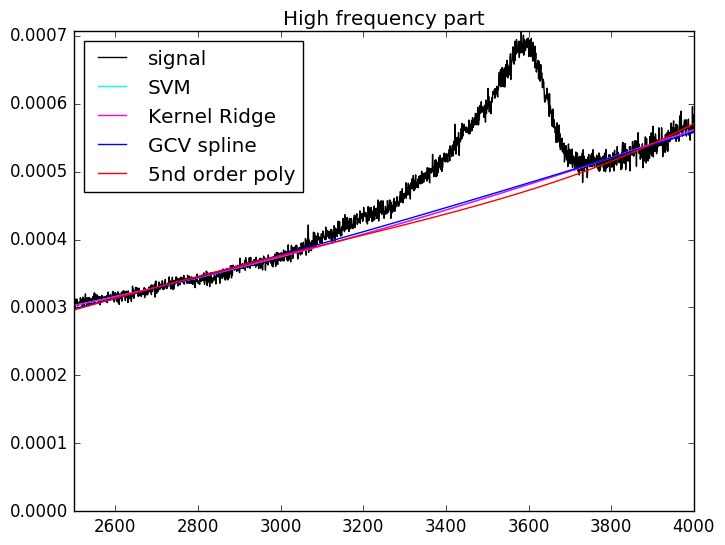

PyObject <matplotlib.legend.Legend object at 0x329163bd0>

In [50]:
x_fit=x[x.>2500.]
y_fit=y_long[x.>2500.]

y_svm, bas_svm = baseline(x_fit,y_fit,roi,"SVMregression")
y_kr, bas_kr = baseline(x_fit,y_fit,roi,"KRregression")
#y_gb, bas_gb = baseline(x_fit,y_fit,roi,"GPregression")
y_gcvspline, bas_gcvspline = baseline(x_fit,y_fit,roi,"gcvspline",p=0.5)
y_poly, bas_poly = baseline(x_fit,y_fit,roi,"poly",p=5.0)

figure()
title("High frequency part")
plot(x_fit,y_fit,"black",label="signal")
plot(x_fit,bas_svm,"cyan",label="SVM")
plot(x_fit,bas_kr,"magenta",label="Kernel Ridge")
#plot(x_fit,bas_gb,"green",label="Gaussian Process")
plot(x_fit,bas_gcvspline,"blue",label="GCV spline")
plot(x_fit,bas_poly,"red",label="5nd order poly")
xlim(2500,4000)
ylim(0,maximum(y_fit[x_fit.>2500]))
legend(loc="best")

# .. and on RAW spectrum:

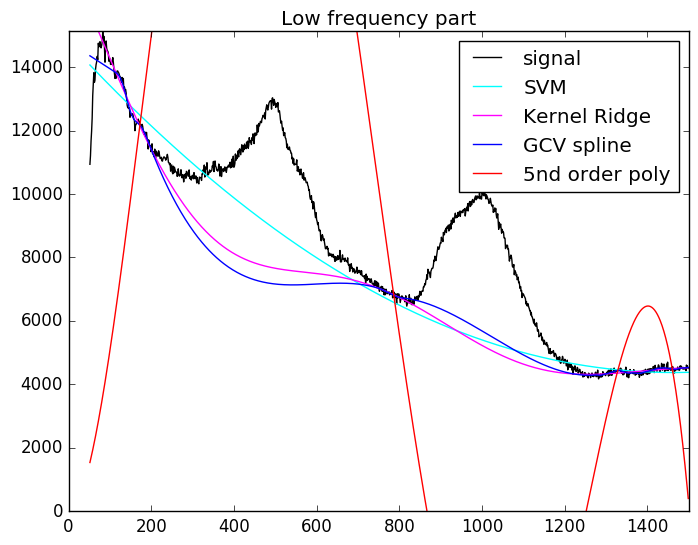

PyObject <matplotlib.legend.Legend object at 0x320baf190>

In [56]:
x_fit=x[x.<1500]
y_fit=y[x.<1500]
# and we need to change the roi because of the Boson peak
roi = [110. 200.; 750. 810.; 1260. 2000;2500 3100; 3750 4000]

y_svm, bas_svm = baseline(x_fit,y_fit,roi,"SVMregression")
y_kr, bas_kr = baseline(x_fit,y_fit,roi,"KRregression")
#y_gb, bas_gb = baseline(x_fit,y_fit,roi,"GPregression")
y_gcvspline, bas_gcvspline = baseline(x_fit,y_fit,roi,"gcvspline",p=[0.1])
y_poly, bas_poly = baseline(x_fit,y_fit,roi,"poly",p=5.0)

figure()
title("Low frequency part")
plot(x_fit,y_fit,"black",label="signal")
plot(x_fit,bas_svm,"cyan",label="SVM")
plot(x_fit,bas_kr,"magenta",label="Kernel Ridge")
#plot(x_fit,bas_gb,"green",label="Gaussian Process")
plot(x_fit,bas_gcvspline,"blue",label="GCV spline")
plot(x_fit,bas_poly,"red",label="5nd order poly")
xlim(0,1500)
ylim(0,maximum(y_fit[x_fit.<1500]))
legend(loc="best")

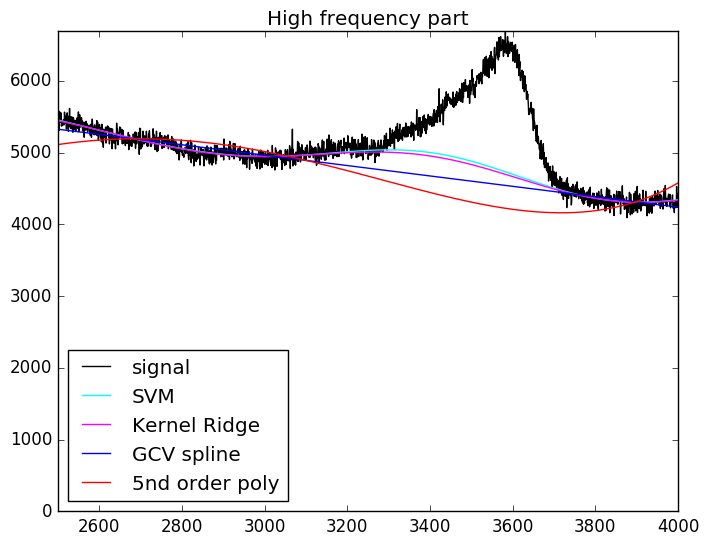

PyObject <matplotlib.legend.Legend object at 0x3287a1f50>

In [55]:
x_fit=x[x.>2500.]
y_fit=y[x.>2500.]

y_svm, bas_svm = baseline(x_fit,y_fit,roi,"SVMregression")
y_kr, bas_kr = baseline(x_fit,y_fit,roi,"KRregression")
#y_gb, bas_gb = baseline(x_fit,y_fit,roi,"GPregression")
y_gcvspline, bas_gcvspline = baseline(x_fit,y_fit,roi,"gcvspline",p=0.5)
y_poly, bas_poly = baseline(x_fit,y_fit,roi,"poly",p=5.0)

figure()
title("High frequency part")
plot(x_fit,y_fit,"black",label="signal")
plot(x_fit,bas_svm,"cyan",label="SVM")
plot(x_fit,bas_kr,"magenta",label="Kernel Ridge")
#plot(x_fit,bas_gb,"green",label="Gaussian Process")
plot(x_fit,bas_gcvspline,"blue",label="GCV spline")
plot(x_fit,bas_poly,"red",label="5nd order poly")
xlim(2500,4000)
ylim(0,maximum(y_fit[x_fit.>2500]))
legend(loc="best")